In [1]:
import pandas as pd
from sklearn import linear_model
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../web/polo_data.csv',sep=';')
print(len(df))
df.head()

795


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,144.900 kr.,2016,81000,2016-12-15,Benzin,23.8,95,A,2500
1,14.900 kr.,2000,181000,2000-02-25,Benzin,17.4,50,M,4600
2,109.900 kr.,2015,105000,2015-05-07,Benzin,24.4,95,M,7173
3,269.900 kr.,2018,36000,2018-09-12,Benzin,16.9,200,A,8700
4,259.900 kr.,2019,39000,2019-04-30,Benzin,21.6,150,A,5200


<h2> Geographical

In [73]:
import numpy as np
zipcodes = df['zip_code'].unique()

zip_dict = {}
for zipcode in zipcodes:
    zip_dict[str(zipcode)] = df['zip_code'].value_counts()[zipcode]

zipcodes = list(zip_dict.keys())
values = list(zip_dict.values())
  
df_zip_regions = pd.read_csv('zip_region.csv',sep=',')

df_zip_regions

,REGION,POSTNR
0,Region Hovedstaden,783
1,Region Hovedstaden,784
2,Region Hovedstaden,785
3,Region Hovedstaden,800
4,Region Hovedstaden,900
...,...,...
1430,Region Nordjylland,9970
1431,Region Nordjylland,9981
1432,Region Nordjylland,9982
1433,Region Nordjylland,9982


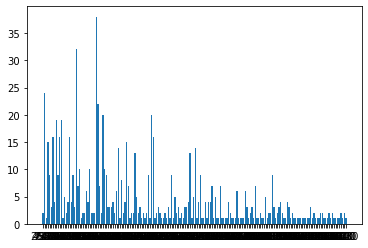

In [70]:
plt.bar(range(len(zip_dict)),values,tick_label=zipcodes)
plt.show()


In [71]:
zip_dict

{'2500': 2,
 '4600': 24,
 '7173': 1,
 '8700': 15,
 '5200': 9,
 '3520': 3,
 '4700': 16,
 '4621': 4,
 '2770': 19,
 '2630': 9,
 '7400': 16,
 '2600': 19,
 '2620': 1,
 '7500': 5,
 '4990': 2,
 '8653': 4,
 '8800': 16,
 '8920': 4,
 '7100': 9,
 '2920': 3,
 '7160': 32,
 '6800': 7,
 '9900': 10,
 '4622': 1,
 '5750': 2,
 '8500': 2,
 '6715': 6,
 '2605': 4,
 '6000': 10,
 '4684': 2,
 '6705': 2,
 '8940': 2,
 '8600': 38,
 '4200': 22,
 '6400': 7,
 '9640': 2,
 '8240': 20,
 '2610': 10,
 '6100': 9,
 '9620': 3,
 '7200': 3,
 '3600': 3,
 '4400': 4,
 '8361': 2,
 '8250': 6,
 '4000': 14,
 '6740': 1,
 '9440': 8,
 '8520': 2,
 '8960': 4,
 '3400': 15,
 '7700': 7,
 '6780': 1,
 '4733': 2,
 '3650': 2,
 '7000': 13,
 '6950': 5,
 '2730': 2,
 '6760': 3,
 '3660': 1,
 '7430': 2,
 '6430': 1,
 '7361': 2,
 '6200': 9,
 '7620': 1,
 '2860': 20,
 '2200': 16,
 '8230': 1,
 '2625': 2,
 '6670': 3,
 '5500': 2,
 '5683': 1,
 '7323': 1,
 '5250': 2,
 '4520': 1,
 '2635': 3,
 '2800': 1,
 '9800': 9,
 '6600': 1,
 '9500': 5,
 '2970': 2,
 '6520': 